In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [4]:
nsample = 50
groups = np.zeros(nsample, int)
groups [20:40] =1
groups [40:] = 2
dummy = pd.get_dummies (groups).values
x = np.linspace(0,20,nsample)
X = np.column_stack((x, dummy [:,1:]))
X = sm.add_constant(X, prepend=False)
beta = [1, 3, -3, 10]
y_true = np.dot(X, beta)
e = np.random.normal(size=nsample)
y = y_true + e

In [11]:
res = sm.OLS(y, X).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     941.4
Date:                Sun, 25 Feb 2024   Prob (F-statistic):           2.81e-41
Time:                        18:09:14   Log-Likelihood:                -57.709
No. Observations:                  50   AIC:                             123.4
Df Residuals:                      46   BIC:                             131.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0387      0.052     19.916      0.0

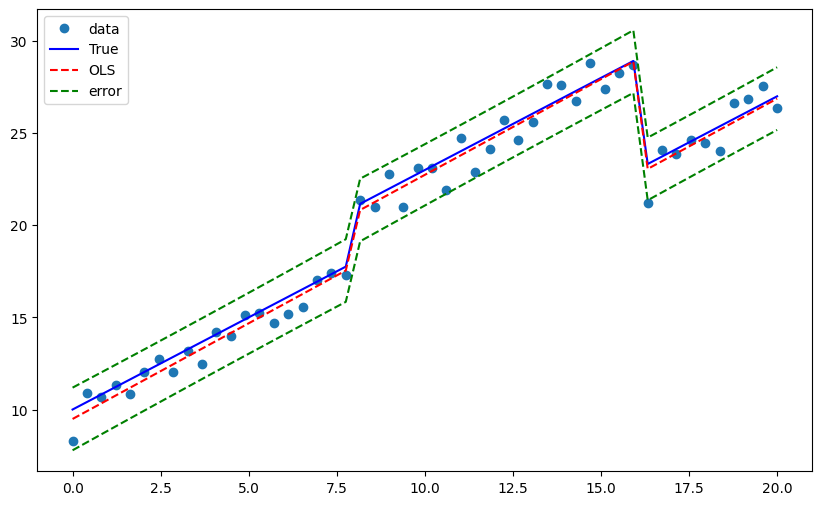

In [12]:
def plot_compare(res, x, y, y_true):
    prstd, iv_1, iv_u = wls_prediction_std(res)
    fig, ax = plt.subplots(figsize=(10,6))  # Crear una figura y un conjunto de ejes
    ax.plot(x, y, 'o', label='data')  # Dibujar puntos de datos
    ax.plot(x, y_true, 'b-', label="True")  # Dibujar la línea de los valores verdaderos
    ax.plot(x, res.fittedvalues, 'r--', label="OLS")  # Dibujar la línea de los valores ajustados por OLS
    ax.plot(x, iv_u, 'g--', label="error")  # Dibujar las barras de error superiores
    ax.plot(x, iv_1, 'g--')  # Dibujar las barras de error inferiores
    ax.legend()  # Mostrar leyendas
    plt.show()  # Mostrar el gráfico

# Suponiendo que has definido x, y, y_true y res en otro lugar de tu código
plot_compare(res, x, y, y_true)  # Llamar a la función plot_compare con los datos y resultados